In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Projects/Face_recoginization/bollywood_celeb_faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.126.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.130.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.133.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.136.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.138.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.139.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.142.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.143.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.147.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0

In [ ]:
!pip install tensorflow

In [ ]:
!unzip /content/drive/MyDrive/Projects/Face_recoginization/Test_Images.zip

Archive:  /content/drive/MyDrive/Projects/Face_recoginization/Test_Images.zip
   creating: content/Test_Images/
   creating: content/Test_Images/Sonam_Kapoor/
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.226.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.229.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.296.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.279.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.329.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.167.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.66.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.282.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.176.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.51.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.57.jpg  
  inflating: content/Test_Images/Sonam_Kapoor/Sonam_Kapoor.26.jpg  
  inflating: cont

In [ ]:
!pip install tensorflow

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import math
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model

In [ ]:
#Checking the Actors
print(os.listdir("/content/bollywood_celeb_faces/bollywood_celeb_faces_0"))
len(os.listdir("/content/bollywood_celeb_faces/bollywood_celeb_faces_0"))


['Akshay_Kumar', 'Riteish_Deshmukh', 'Priyanka_Chopra', 'Shreyas_Talpade', 'Uday_Chopra', 'Arjun_Rampal', 'Kajol', 'Shruti_Haasan', 'Abhay_Deol', 'Tusshar_Kapoor', 'Arjun_Kapoor', 'Varun_Dhawan', 'Shah_Rukh_Khan', 'Esha_Gupta', 'Madhuri_Dixit', 'Salman_Khan', 'Kiara_Advani', 'Kareena_Kapoor', 'Tabu', 'Kajal_Aggarwal', 'Ileana_DCruz', 'Katrina_Kaif', 'Zareen_Khan', 'Prachi_Desai', 'Pooja_Hegde', 'Richa_Chadda', 'Rani_Mukerji', 'Ranbir_Kapoor', 'Emraan_Hashmi', 'Kunal_Khemu', 'Irrfan_Khan', 'John_Abraham', 'Akshaye_Khanna', 'Sushant_Singh_Rajput', 'Jacqueline_Fernandez', 'Bhumi_Pednekar', 'R_Madhavan', 'Aishwarya_Rai', 'Shraddha_Kapoor', 'Vicky_Kaushal', 'Tiger_Shroff', 'Amitabh_Bachchan', 'Yami_Gautam', 'Alia_Bhatt', 'Vaani_Kapoor', 'Kriti_Kharbanda', 'Sara_Ali_Khan', 'Huma_Qureshi', 'Prabhas', 'Parineeti_Chopra', 'Bobby_Deol', 'Disha_Patani', 'Anil_Kapoor', 'Asin', 'Deepika_Padukone', 'Hrithik_Roshan', 'Rajkummar_Rao', 'Nargis_Fakhri', 'Karisma_Kapoor', 'Mrunal_Thakur', 'Govinda', 'Son

100

In [ ]:
actors=os.listdir("/content/bollywood_celeb_faces/bollywood_celeb_faces_0")
actors=sorted(actors)
np.save("/content/actor_name.npy", actors)

In [ ]:
actors=os.listdir("/content/bollywood_celeb_faces/bollywood_celeb_faces_0")
for actor in actors:
  images_folder_path='/content/bollywood_celeb_faces/bollywood_celeb_faces_0/'+actor
  no_images=len(os.listdir(images_folder_path))
  print(actor,' : ',no_images,end='')
  print('\n')

Akshay_Kumar  :  82

Karisma_Kapoor  :  92

Nana_Patekar  :  48

Asin  :  104

Shah_Rukh_Khan  :  95

Katrina_Kaif  :  99

Irrfan_Khan  :  77

Kangana_Ranaut  :  96

Bobby_Deol  :  60

Riteish_Deshmukh  :  63

Pooja_Hegde  :  114

Preity_Zinta  :  106

Kajol  :  96

Prachi_Desai  :  90

Sunny_Deol  :  61

Parineeti_Chopra  :  92

Richa_Chadda  :  82

Nushrat_Bharucha  :  78

Arshad_Warsi  :  71

Shreyas_Talpade  :  43

Rani_Mukerji  :  83

Vidya_Balan  :  105

Farhan_Akhtar  :  62

Aishwarya_Rai  :  125

Kunal_Khemu  :  52

Kajal_Aggarwal  :  123

Aftab_Shivdasani  :  68

Ayushmann_Khurrana  :  85

Suniel_Shetty  :  48

Ameesha_Patel  :  82

Esha_Gupta  :  86

Huma_Qureshi  :  97

Tusshar_Kapoor  :  48

Disha_Patani  :  111

Paresh_Rawal  :  61

Bhumi_Pednekar  :  68

Rajkummar_Rao  :  73

Ileana_DCruz  :  102

Saif_Ali_Khan  :  68

Ranbir_Kapoor  :  85

Sonam_Kapoor  :  93

Arjun_Rampal  :  65

Tabu  :  87

Varun_Dhawan  :  98

Kiara_Advani  :  96

John_Abraham  :  82

Anushka_Sharma 

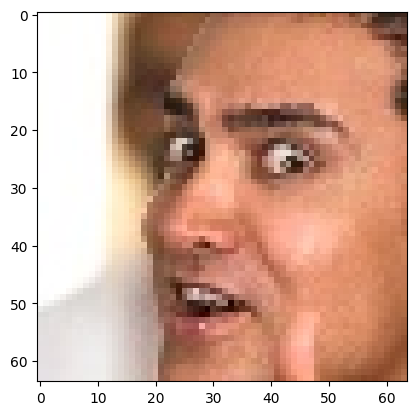

(64, 64, 3)

In [ ]:
img=cv2.imread('/content/bollywood_celeb_faces/bollywood_celeb_faces_0/Aamir_Khan/Aamir.94.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

In [ ]:
visual_datagen=ImageDataGenerator(rotation_range=45,shear_range=0.3,horizontal_flip=True,vertical_flip=True,brightness_range=[0.5, 1.5])

In [ ]:
def visualize(img_path):
  #reading the image
  img=img_path
  img = cv2.imread(img)
  img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  #preparing
  img = np.expand_dims(img, axis=0)          #.flow() require 4 dimentions (num_samples, height, width, channels)

  #obtaning the augmentations and visualization
  for i in range(10):
    augmented_image=visual_datagen.flow(img)
    plt.figure(figsize=(4, 4))
    augmented_image = augmented_image.next()[0]  # Getting the next image w.r.t the num_samples
    plt.imshow(augmented_image.astype('uint8'))  # Ensuring the image is in the correct data type for display
    plt.axis('off')
    plt.show()

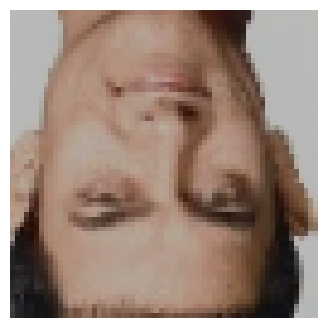

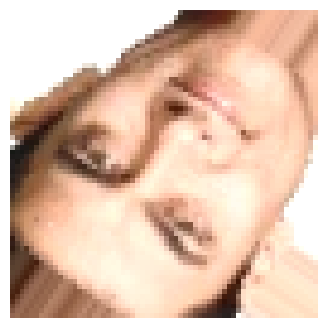

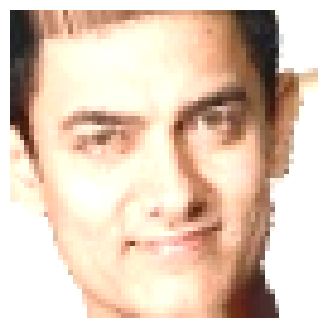

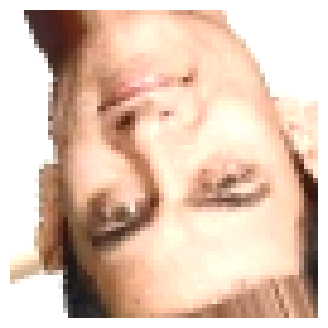

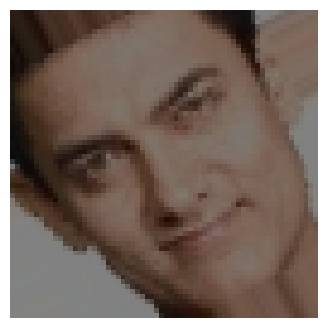

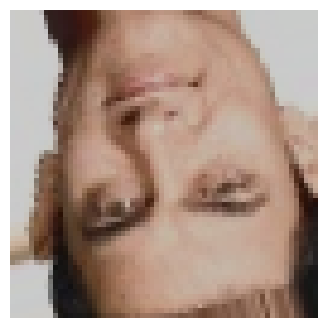

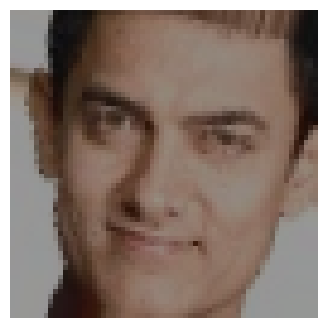

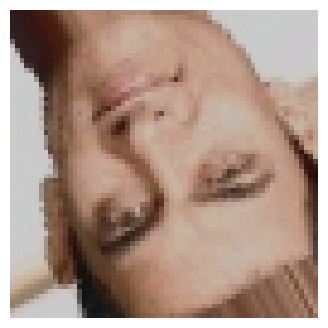

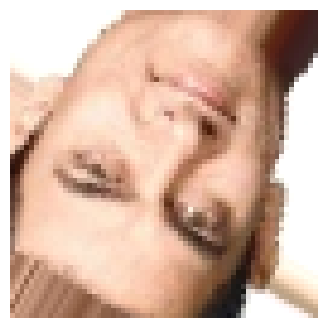

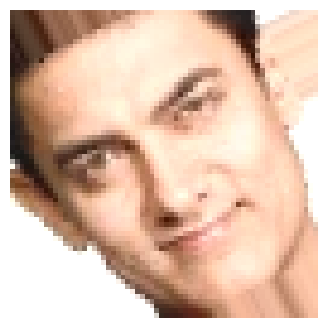

In [ ]:
img_path='/content/bollywood_celeb_faces/bollywood_celeb_faces_0/Aamir_Khan/Aamir.100.jpg'
visualize(img_path)

In [ ]:
#defining the datagenerators for training and testing data
train_datagen=ImageDataGenerator(rotation_range=45,shear_range=0.3,horizontal_flip=True,vertical_flip=True,brightness_range=[0.5, 1.5],preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
#The generators for training and testing data
train=train_datagen.flow_from_directory(directory="/content/bollywood_celeb_faces/bollywood_celeb_faces_0",target_size=(224,224))
val = val_datagen.flow_from_directory(directory="/content/content/Test_Images",target_size=(224,224))

Found 8566 images belonging to 100 classes.
Found 2000 images belonging to 100 classes.


In [ ]:
#Total number of batches
print(len(train))
print(len(val))

268
63


In [ ]:
#getting the first batch of the traning set
batch=train[0]
print(type(batch))    #tuple
print(len(batch))     #the imageset and their truth values(one-hot-encoded)
print(batch)          #the imageset and the encodings

<class 'tuple'>
2
(array([[[[-8.1939003e+01, -9.2778999e+01, -1.0068000e+02],
         [-8.1939003e+01, -9.2778999e+01, -1.0068000e+02],
         [-8.0939003e+01, -9.3778999e+01, -1.0068000e+02],
         ...,
         [-3.4939003e+01, -5.5778999e+01, -6.2680000e+01],
         [-3.4939003e+01, -5.5778999e+01, -6.2680000e+01],
         [-3.4939003e+01, -5.5778999e+01, -6.2680000e+01]],

        [[-8.1939003e+01, -9.2778999e+01, -1.0068000e+02],
         [-8.1939003e+01, -9.2778999e+01, -1.0068000e+02],
         [-8.0939003e+01, -9.3778999e+01, -1.0068000e+02],
         ...,
         [-3.4939003e+01, -5.5778999e+01, -6.2680000e+01],
         [-3.4939003e+01, -5.5778999e+01, -6.2680000e+01],
         [-3.4939003e+01, -5.5778999e+01, -6.2680000e+01]],

        [[-8.1939003e+01, -9.2778999e+01, -1.0068000e+02],
         [-8.1939003e+01, -9.2778999e+01, -1.0068000e+02],
         [-8.0939003e+01, -9.3778999e+01, -1.0068000e+02],
         ...,
         [-3.8939003e+01, -5.7778999e+01, -6.46800

In [ ]:
print(batch[0].shape)   #number of images along with their dimentions
print(batch[1].shape)   #number of encodings along with their lengths

(32, 224, 224, 3)
(32, 100)


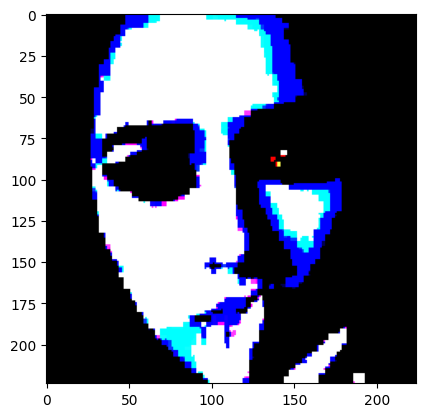

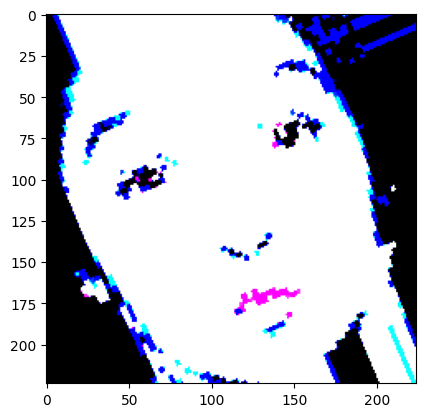

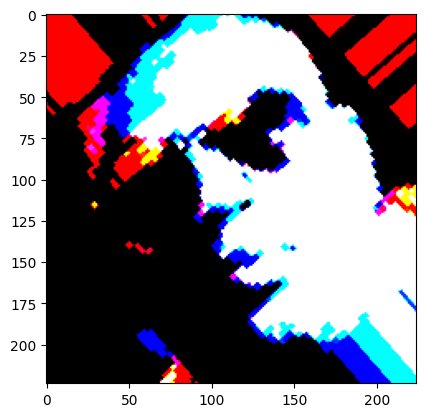

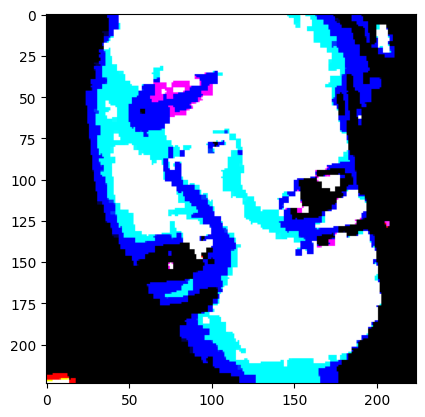

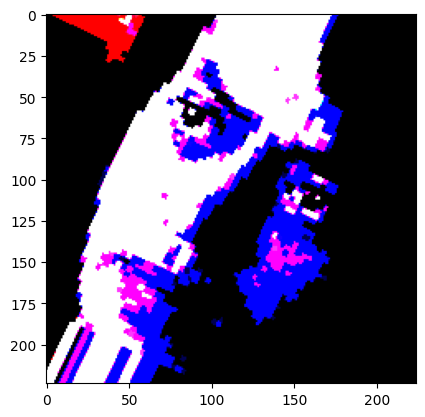

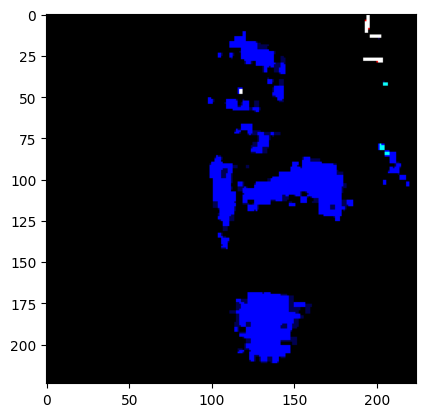

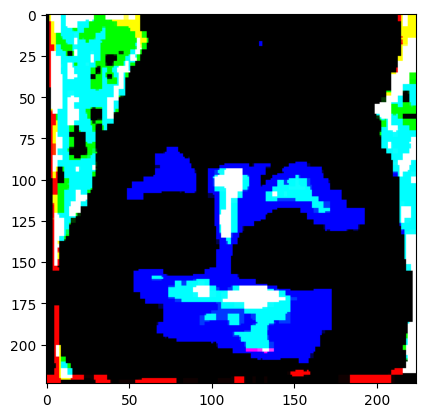

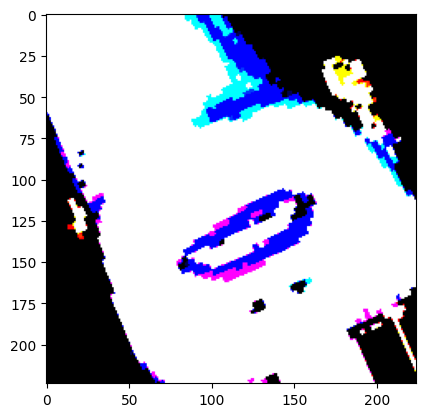

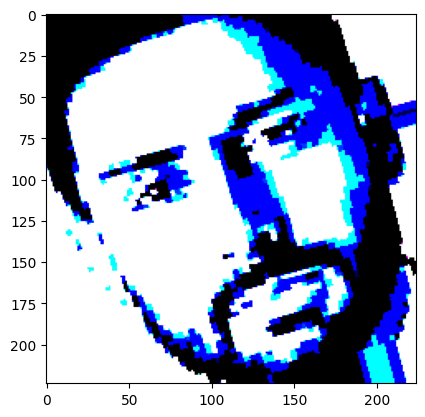

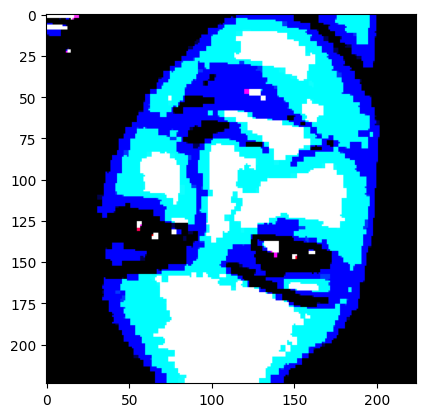

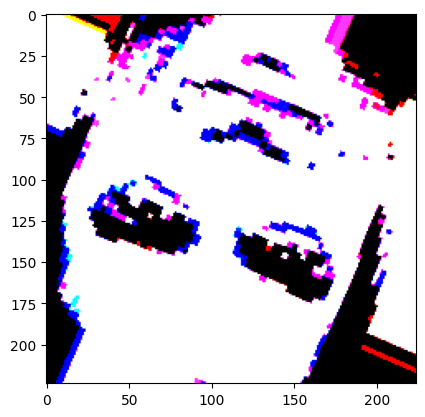

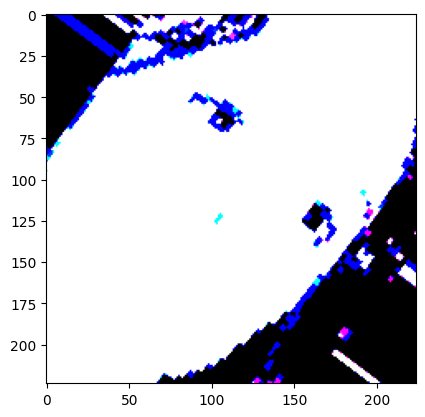

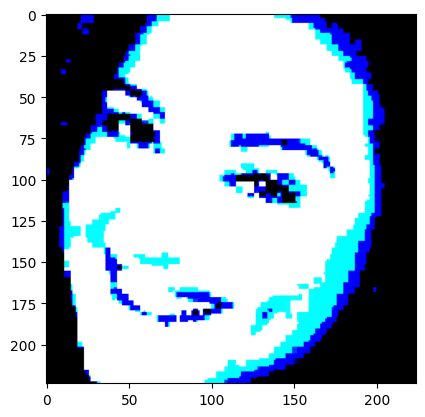

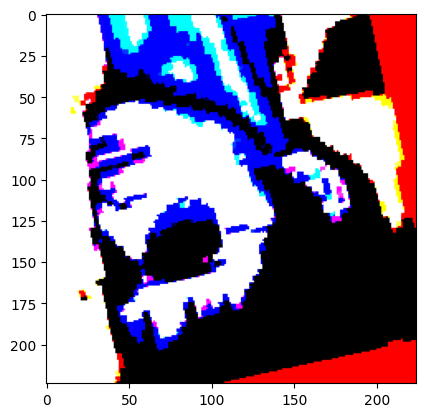

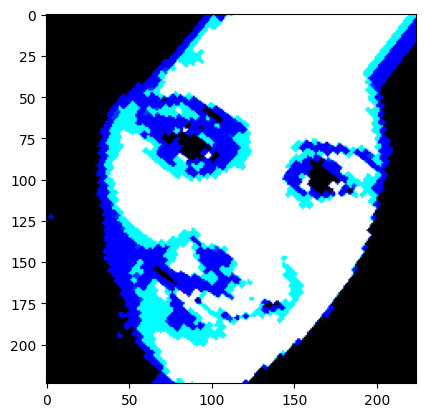

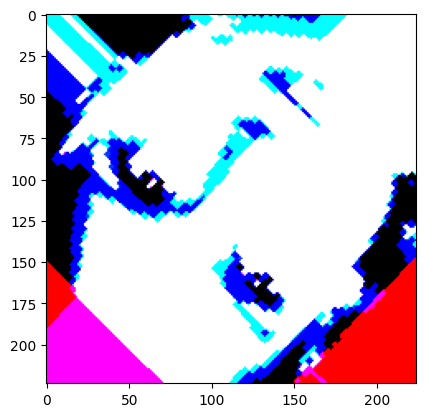

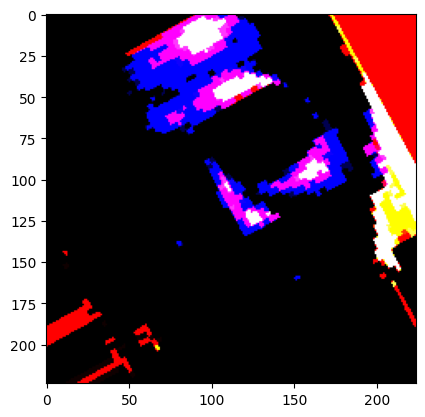

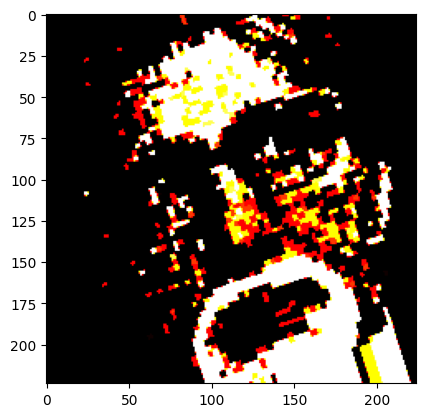

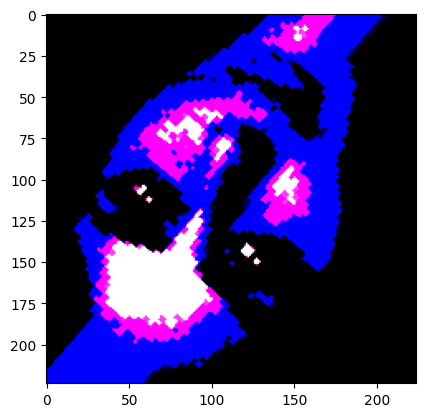

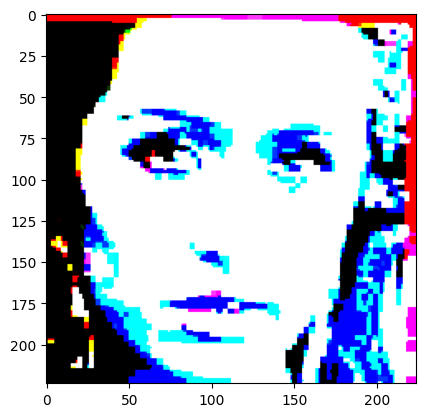

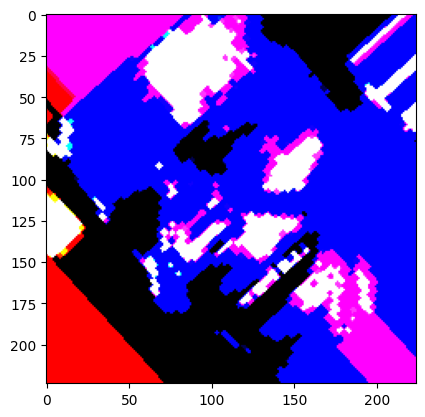

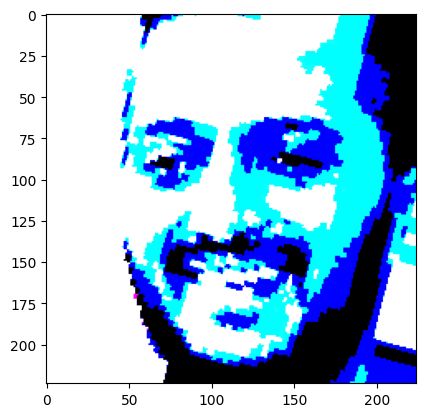

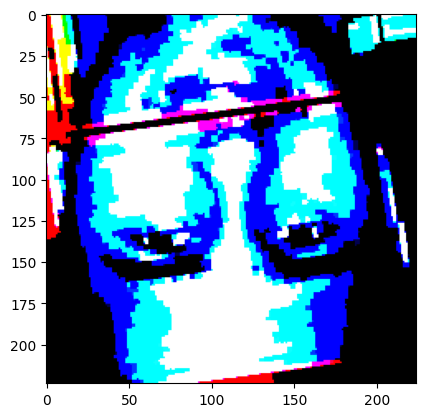

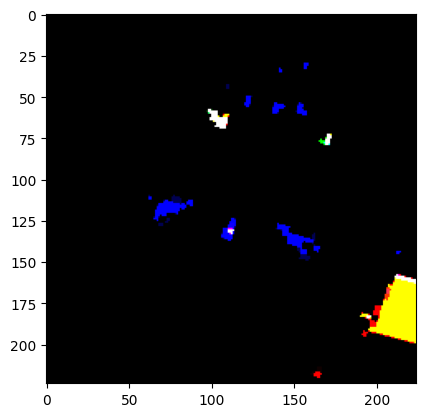

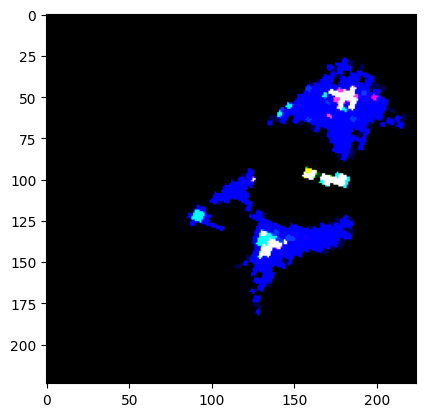

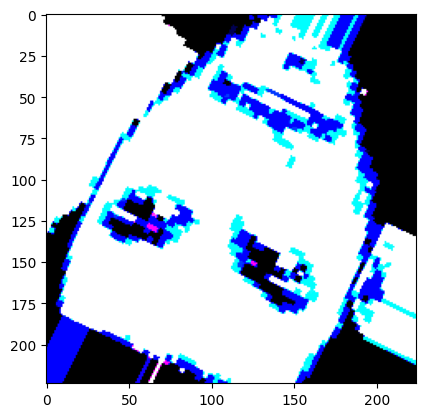

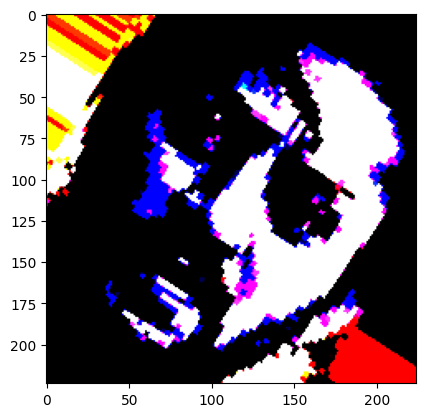

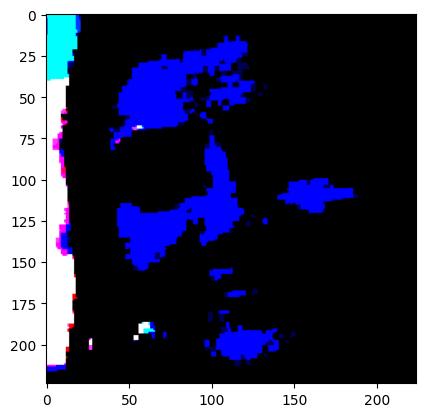

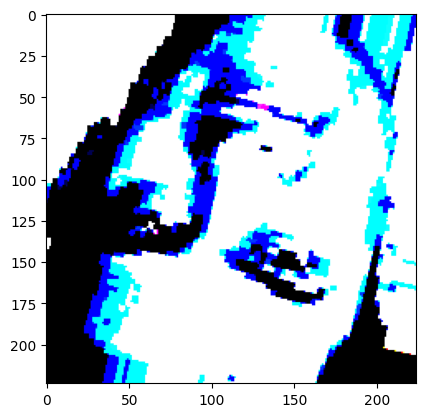

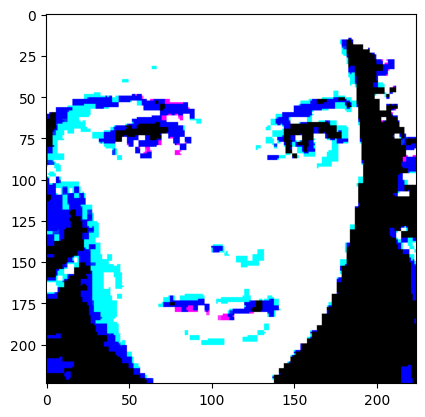

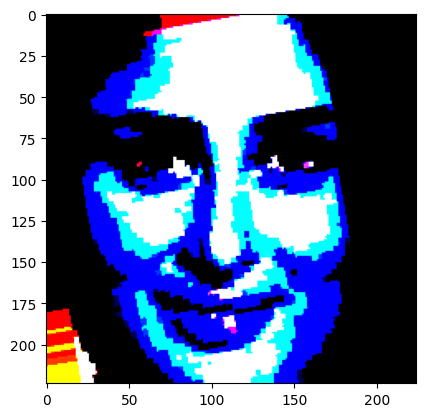

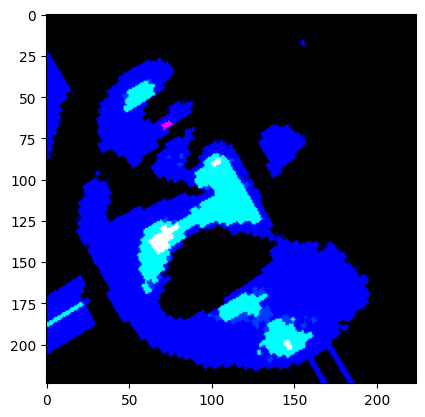

In [ ]:
images=batch[0]
for image in images:
  plt.imshow(image)
  plt.show()


# **Model Definition**

In [ ]:
resnet50_base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet50_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
#Testing the working of layers
input_data = np.array([                                              #Assumed output of resnet50 of shape (2,2,3)
                      [[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]],
                      [[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]],
                      ])

input_data = np.expand_dims(input_data, axis=0)

x = GlobalAveragePooling2D()(input_data)                             #Flatenning the data
print(x.shape)
x = Dense(512, activation='relu')(x)                                 #Converting the flatenned layer to desired shape
print(x.shape)


normalized_x = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(x) # Applying L2 normalization using Lambda layer
print(normalized_x.shape)

output = Dense(100, activation=None)(x)
print(output.shape)

(1, 3)
(1, 512)
(1, 512)
(1, 100)


In [ ]:
embedding_size = 512  # Defining the desired embedding size
num_classes = 100     #The number of actors in the directory

x = resnet50_base.output                          #giving x the final numpy array of the resnet50
x = GlobalAveragePooling2D()(x)                   #For each feature map, it calculates the average value, effectively reducing the spatial dimensions to 1x1.(flatenning)
x = Dense(embedding_size, activation='relu')(x)   #reducing the feature-map to he desired empedding size
x = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(x)   # Normalizing the embeddings
output = Dense(num_classes, activation=None)(x)    #the Arcface loss input

In [ ]:
model = Model(inputs=resnet50_base.input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
def arcface_loss(y_true, y_pred, margin=0.5, scale=64):
    # Extracting the cosine similarity values from the predictions
    cos_t = y_pred
    sin_t = tf.math.sqrt(1 - tf.math.square(cos_t))

    # Calculate the threshold and margin values
    threshold = tf.math.cos(tf.constant(math.pi - margin))
    cos_m = tf.math.cos(tf.constant(margin))
    sin_m = tf.math.sin(tf.constant(margin))
    safe_margin = sin_m * margin

    # Calculate the modified cosine values using the margin
    cos_t_margin = tf.where(cos_t > threshold,
                            cos_t * cos_m - sin_t * sin_m,
                            cos_t - safe_margin)

    # Apply one-hot encoding to the true labels
    mask = y_true
    cos_t_onehot = cos_t * mask
    cos_t_margin_onehot = cos_t_margin * mask

    # Calculate the final logits
    logits = (cos_t + cos_t_margin_onehot - cos_t_onehot) * scale

    # Compute softmax cross-entropy loss
    losses = tf.nn.softmax_cross_entropy_with_logits(y_true, logits)

    return losses

In [ ]:
model.compile(optimizer='adam', loss=arcface_loss, metrics=['accuracy'])

In [ ]:
#EarlyStopping-Stop training when a monitored metric(loss or accuracy) has stopped improving.
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
#ModelCheckpoint-to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.
mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)
cb=[es,mc]

In [ ]:
model.fit(train,epochs=50,callbacks=cb,validation_data=val)

Epoch 1/50
268/268 [==============================] - ETA: 0s - loss: 32.8641 - accuracy: 0.0259
Epoch 1: val_accuracy improved from -inf to 0.03200, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


268/268 [==============================] - 220s 659ms/step - loss: 32.8641 - accuracy: 0.0259 - val_loss: 26.9475 - val_accuracy: 0.0320
Epoch 2/50
268/268 [==============================] - ETA: 0s - loss: 20.1180 - accuracy: 0.0407
Epoch 2: val_accuracy did not improve from 0.03200
268/268 [==============================] - 174s 649ms/step - loss: 20.1180 - accuracy: 0.0407 - val_loss: 20.1638 - val_accuracy: 0.0255
Epoch 3/50
268/268 [==============================] - ETA: 0s - loss: 19.2184 - accuracy: 0.0737
Epoch 3: val_accuracy improved from 0.03200 to 0.03800, saving model to best_model.h5
268/268 [==============================] - 173s 645ms/step - loss: 19.2184 - accuracy: 0.0737 - val_loss: 20.0440 - val_accuracy: 0.0380
Epoch 4/50
268/268 [==============================] - ETA: 0s - loss: 18.9047 - accuracy: 0.1152
Epoch 4: val_accuracy improved from 0.03800 to 0.10750, saving model to best_model.h5
268/268 [==============================] - 168s 624ms/step - loss: 18.9047 

In [ ]:
with tf.keras.utils.custom_object_scope({'arcface_loss': arcface_loss}):
    model = load_model('/content/drive/MyDrive/Projects/Face_recoginization/face_recognizer.h5')

In [ ]:
actor_name = np.load("/content/drive/MyDrive/Projects/Face_recoginization/actor_name.npy")

In [ ]:
def prediction(path):
  img=load_img(path,target_size=(224,224))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  predictions=model.predict(img)
  pred=np.argmax(predictions)
  print(actor_name[pred])

In [ ]:
prediction('/content/bollywood_celeb_faces/bollywood_celeb_faces_0/Deepika_Padukone/Deepika_Padukone.103.jpg')

1/1 [==============================] - 0s 176ms/step
Deepika_Padukone


In [ ]:
def arcface_loss(y_true, y_pred, margin=0.5, scale=64):

    # Calculating the sin_t from the given cosine values
    cos_t = y_pred                                             #the similarity values-predicted
    sin_t = tf.math.sqrt(1 - tf.math.square(cos_t))            #calculating sin_t


    # Calculating the threshold and margin values(to adjust the cosine similarity between embeddings(y_pred))
    threshold = tf.math.cos(tf.constant(math.pi - margin))     #It helps determine when to modify cosine similarity values(when value surpasses this threshold based on the margin)
    cos_m = tf.math.cos(tf.constant(margin))                   #cos of the angular margin
    sin_m = tf.math.sin(tf.constant(margin))                   #sin of the angular margin
    safe_margin = sin_m * margin                               #safety measure to control the extent to which the cosine similarity values can be modified

    # Calculating the modified cosine values using the margin
    cos_t_margin = tf.where(cos_t > threshold,                 #will return 'cos_t * cos_m - sin_t * sin_m' if true or 'cos_t - safe_margin' if false
                            cos_t * cos_m - sin_t * sin_m,
                            cos_t - safe_margin)

    # Keeping only the required cost_t and cos_t_margin value
    mask = y_true                                             #the one hot encoded truth value
    cos_t_onehot = cos_t * mask                               #masked cost_t array
    cos_t_margin_onehot = cos_t_margin * mask                 #masked cost_t_margin array

    # Calculating the final logits
    logits = (cos_t + cos_t_margin_onehot - cos_t_onehot) * scale

    # Computing softmax loss on given modified logits
    losses = tf.nn.softmax_cross_entropy_with_logits(y_true, logits)

    return losses

y_true = tf.constant([1, 0, 0, 0], dtype=tf.float32)
y_pred = tf.constant([0.9, 0.4, 0.3, 0.1], dtype=tf.float32)
arcface_loss(y_true,y_pred, margin=0.5, scale=64)

In [ ]:
model.fit(train, epochs=10, validation_data=val, batch_size=32)

In [ ]:
# Load an image for testing
img_path = '/content/bollywood_celeb_faces/bollywood_celeb_faces_0/Aamir_Khan/Aamir.101.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image to match ResNet50's requirements
preprocessed_img = preprocess_input(img_array)

# Assuming you've already defined resnet50_base and other layers as in your previous code
# Pass the preprocessed image through the network
embedding_model = tf.keras.Model(inputs=resnet50_base.input, outputs=output)
embedding_model.summary()

# Get the predictions/embeddings
embeddings = embedding_model.predict(preprocessed_img)

# Print the shape of the embeddings
print("Embeddings shape:", embeddings.shape)

In [ ]:
img='/content/bollywood_celeb_faces_0/Aamir_Khan/Aamir.100.jpg'
img = cv2.imread(img)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img = np.expand_dims(img, axis=0)
augmented_images=train_datagen.flow(img)

In [ ]:
len(augmented_images)
augmented_images[0][0].shape

In [ ]:
plt.figure(figsize=(4, 4))
augmented_image = augmented_images.next()[0]  # Get the augmented image from the generator
plt.imshow(augmented_image.astype('uint8'))  # Ensure the image is in the correct data type for display
plt.axis('off')
plt.show()

In [ ]:
# Define the ArcFace loss function (you'll need to implement this)
# def arcface_loss(y_true, y_pred):
#     # Implement ArcFace loss logic here
#     pass